# PDAN8411 POE

# Pipelines and Text Data Analysis
    
This notebook performs Pipelines and Text Data Analysis. 

### What are Pipelines and Text Data?

Pipelines are organized workflows used in machine learning to automate the series of tasks involved in data processing and model training. Rather than writing separate code for each preprocessing step and then applying a model, a pipeline combines these elements into a cohesive process. This not only makes the code simpler but also guarantees that the same sequence of transformations is consistently applied during both training and prediction. A pipeline usually consists of preprocessing steps like text vectorization or feature scaling, followed by the model itself, such as logistic regression or a Naive Bayes classifier. The benefit of using a pipeline is that it enhances the reproducibility of experiments and ensures that the model evaluation process is more efficient and less prone to errors. Scikit-learn and imbalanced-learn are well-known Python libraries that offer built-in support for pipelines, enabling developers to merge steps like TF-IDF vectorization, SMOTE (for addressing imbalanced datasets), and classifiers into a single, callable object (Pedregosa et al., 2011).

Text data, in contrast, refers to unstructured information made up of characters and symbols that are used in natural language. Examples of text data include emails, reviews, social media posts, and transcripts. In machine learning, particularly in natural language processing (NLP), text data needs to be converted into a numerical format before the algorithms can use it. This conversion process is called text preprocessing and typically involves several important steps. These steps consist of removing punctuation, changing text to lowercase, tokenization (which means breaking text into words or terms), eliminating stopwords (common but unhelpful words like 'the' or 'and'), and applying either stemming or lemmatization to bring words down to their base or root form. The last step is to convert the cleaned text into numerical vectors using techniques like CountVectorizer or TF-IDF (Term Frequency-Inverse Document Frequency). These vector representations enable machine learning models to understand and learn from textual patterns (Jurafsky & Martin, 2021).

### Why is this dataset appropriate?

Source: https://www.kaggle.com/datasets/studymart/spam-email-detection-dataset (StudyMart, 2023)

The Kaggle Spam Email Detection Dataset is well-suited for text classification as it is distinctly labeled for binary classification (spam vs. not spam), which makes it ideal for supervised learning. It features natural language email content, enabling the use of standard NLP techniques such as tokenization and TF-IDF vectorization.

The dataset is clean, of moderate size, and provided in an easy-to-use CSV format, making it perfect preprocessing, building pipelines, and evaluating models without requiring extensive computational resources. The amount of entries is enough to say that the model can be significant. It addresses a real-world issue—spam filtering which shows its relevance and the transferability of skills.

### Justification of Algorithm used?

The chosen algorithm for this analysis is the Multinomial Naive Bayes classifier. This algorithm is effective for text classification tasks like spam detection due to its simplicity, speed, and ability to handle high-dimensional data, which is typical in natural language processing (NLP).

Multinomial Naive Bayes works by finding out the likelihood that a specific email falls into a category (spam or not spam) based on the frequency of words it contains. It assumes that the features (words) are conditionally independent, which, although a simplification, works well in practice, particularly when combined with TF-IDF vectorization to prioritize word significance.

This algorithm is justified for several reasons:

- Efficiency – It needs relatively little training data and is computationally efficient, making it suitable for large or sparse datasets like text (Rennie et al., 2003).

- Proven effectiveness – Naive Bayes has consistently shown strong performance in spam detection benchmarks and is often used as a baseline for email classification challenges (Metsis, Androutsopoulos and Paliouras, 2006).

- Interpretability – Its a straightforward examination of word probabilities, which understands the factors influencing model predictions – a crucial aspect in practical machine learning applications.



### Steps:
**1. Dataset Acquisition**

- Installed the Kaggle API and used it to download the Spam Email Detection Dataset.

- Unzipped the dataset for use.

**2. Data Loading & Initial Inspection**

- Loaded the CSV data using pandas.

- Inspected the dataset shape and previewed the top rows.

- Focused only on the two most relevant columns (likely text and spam).

**3. Data Cleaning**

- Removed null values with dropna().

- Removed duplicate rows.

- Checking column types and structure.

Ensured all values in the spam column were numeric:
- Applied a function to extract numeric values.
- Dropped rows with invalid entries.

**4. Exploratory Data Analysis (EDA)**

- Checked value counts for the spam column to observe class distribution.

- Created a bar plot to visualize the balance between spam and non-spam emails.

**5. Text Preprocessing**

- Lowercasing text, removing punctuation.

- Tokenization and vectorization using CountVectorizer or TfidfVectorizer.

**6. Handling Class Imbalance**

- Used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset classes before model training.

**7. Model Building & Evaluation**

- Models like Naive Bayes were trained.

- Evaluation metrics used: accuracy, precision, recall, F1 score.

## Pipeline and Text Data Analysis

Python Kernal Version: 3.11.7 

Operating system: Mac iOS.

Sections:

1. Load Dataset
2. Clean Data
3. EDA
4. Text Preprocessing
5. Train/Test Split
6. Balance Data
7. Model Building and Evaluation
8. Conclusion
9. Reference List

In [1]:
# Access the Kaggle API
!pip install kaggle

In [2]:
# Downloading the dataset through the Kaggle API
!kaggle datasets download studymart/spam-email-detection-dataset

Dataset URL: https://www.kaggle.com/datasets/studymart/spam-email-detection-dataset
License(s): unknown
spam-email-detection-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# Unzipping the file to access the dataset.
!tar -xf spam-email-detection-dataset.zip

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,recall_score,f1_score,precision_score

In [5]:
# Reading the emails file into a DataFrame
df = pd.read_csv('emails.csv')

In [ ]:
df

(5730, 110)

# Data Cleaning

In [7]:
# We only want the first 2 rows as the other features are irrelevant
df=df.iloc[:,:2]

In [8]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5725,Subject: re : research and development charges...,0
5726,"Subject: re : receipts from visit jim , than...",0
5727,Subject: re : enron case study update wow ! a...,0
5728,"Subject: re : interest david , please , call...",0


In [9]:
df.shape

(5730, 2)

There are 5730 rows and 2 columns of data.

In [11]:
df.isnull().sum()

text    0
spam    2
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

text    0
spam    0
dtype: int64

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(5695, 2)

There are 5695 rows and 2 columns of data.

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5695 entries, 0 to 5729
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5695 non-null   object
 1   spam    5695 non-null   object
dtypes: object(2)
memory usage: 133.5+ KB


In [17]:
df['spam'].value_counts()

spam
0                                                                                               4326
1                                                                                               1367
 its termination would not  have such a phenomenal impact on the power situation .  however        1
 mr suresh prabhu                                                                                  1
Name: count, dtype: int64

In [18]:
# Define a function to extract numeric values from the 'spam' column
def extract_numeric_value(value):
    try:
        # Attempt to convert the value to an integer
        return int(value)
    except ValueError:
      # If conversion fails (e.g., value is not a number), return None
        return None

In [19]:
#Apply the function to the 'spam' column to ensure all values are numeric
df['spam'] = df['spam'].apply(extract_numeric_value)

In [20]:
#Remove the rows with invalid or missing values
df=df.drop(df[df['spam'].isnull()].index)

# EDA

In [21]:
#Convert the 'spam' column to integer type
df['spam'] = df['spam'].astype(int)
df['spam'].value_counts()

spam
0    4326
1    1367
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Spam and Non-Spam Emails')

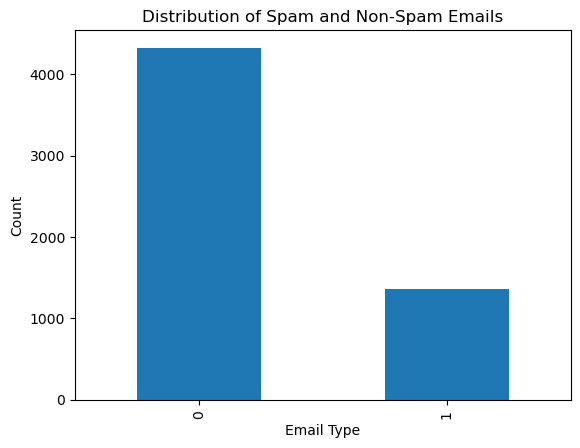

In [22]:
df['spam'].value_counts().plot(kind='bar')
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Emails')

<Axes: ylabel='count'>

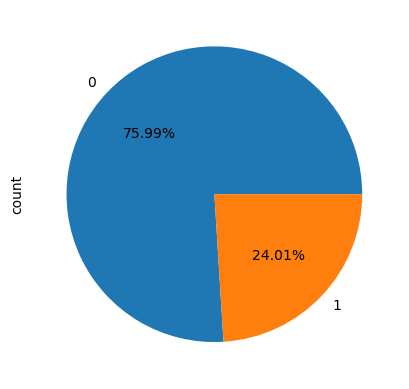

In [59]:
df['spam'].value_counts().plot(kind='pie',autopct = '%0.2f%%')

# Text Preprocessing

(Khan, 2021) 

In [23]:
X = df['text']

In [43]:
y = df['spam']

In [24]:
def remove_punctuation(text):
    punctuationfree = "".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [25]:
# Apply remove punctuation
X_punctuation_free = X.apply(lambda x: remove_punctuation(x))
X_punctuation_free.head(5)

0    Subject naturally irresistible your corporate ...
1    Subject the stock trading gunslinger  fanny is...
2    Subject unbelievable new homes made easy  im w...
3    Subject 4 color printing special  request addi...
4    Subject do not have money  get software cds fr...
Name: text, dtype: object

In [26]:
# Convert to lower case
X_lowered = X_punctuation_free.apply(lambda x: x.lower())
X_lowered.head(5)

0    subject naturally irresistible your corporate ...
1    subject the stock trading gunslinger  fanny is...
2    subject unbelievable new homes made easy  im w...
3    subject 4 color printing special  request addi...
4    subject do not have money  get software cds fr...
Name: text, dtype: object

In [27]:
# Define a function to tokenize text
def tokenize(text):
    for x in text:
        output = text.split()
    return output

In [28]:
tokens = X_lowered.apply(lambda x: tokenize(x))

In [29]:
tokens.head()

0    [subject, naturally, irresistible, your, corpo...
1    [subject, the, stock, trading, gunslinger, fan...
2    [subject, unbelievable, new, homes, made, easy...
3    [subject, 4, color, printing, special, request...
4    [subject, do, not, have, money, get, software,...
Name: text, dtype: object

In [ ]:
# Installing NLTK Data
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/calvinstott/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/calvinstott/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/calvinstott/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

In [33]:
X_no_stopwords = tokens.apply(lambda x: remove_stopwords(x))

In [34]:
X_no_stopwords

0       [subject, naturally, irresistible, corporate, ...
1       [subject, stock, trading, gunslinger, fanny, m...
2       [subject, unbelievable, new, homes, made, easy...
3       [subject, 4, color, printing, special, request...
4       [subject, money, get, software, cds, software,...
                              ...                        
5725    [subject, research, development, charges, gpg,...
5726    [subject, receipts, visit, jim, thanks, invita...
5727    [subject, enron, case, study, update, wow, day...
5728    [subject, interest, david, please, call, shirl...
5729    [subject, news, aurora, 5, 2, update, aurora, ...
Name: text, Length: 5693, dtype: object

In [35]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [36]:
lemmatizer = WordNetLemmatizer()

In [37]:
# Function to lemmatize text
def lemmatize_words(text):
    lemmatized_output = [lemmatizer.lemmatize(word) for word in text]
    return lemmatized_output

In [38]:
# Apply lemmatization
X_lemmatized = X_no_stopwords.apply(lambda x: lemmatize_words(x))

In [39]:
X_lemmatized.head(5)

0    [subject, naturally, irresistible, corporate, ...
1    [subject, stock, trading, gunslinger, fanny, m...
2    [subject, unbelievable, new, home, made, easy,...
3    [subject, 4, color, printing, special, request...
4    [subject, money, get, software, cd, software, ...
Name: text, dtype: object

In [40]:
# Combine tokens back to a single string
X_final_text = X_lemmatized.map(' '.join)

In [41]:
X_final_text.head(5)

0    subject naturally irresistible corporate ident...
1    subject stock trading gunslinger fanny merrill...
2    subject unbelievable new home made easy im wan...
3    subject 4 color printing special request addit...
4    subject money get software cd software compati...
Name: text, dtype: object

# Train/Test Split

In [44]:
from sklearn.model_selection import train_test_split

#Due to an imbalance dataset we will use stratify=y to preserve the same proportion of classes in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final_text,y,test_size=0.5,random_state=42,stratify=y)

In [49]:
# Understanding the size of the split
print("x_train shape: ", X_train.shape )
print("x_test shape: ", X_test.shape )
print("y_train shape: ", y_train.shape )
print("y_test shape: ", y_test.shape )

x_train shape:  (2846,)
x_test shape:  (2847,)
y_train shape:  (2846,)
y_test shape:  (2847,)


In [45]:
# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

In [46]:
# Using the  MultinomialNB classifier
nb_model_pipeline = MultinomialNB()

# Balance Data

In [47]:
# Using SMOTE for oversampling
smote = SMOTE(random_state=42)

In [48]:
# Construct pipeline with TF-IDF vectorization, SMOTE, and MultinomialNB classifier
pipeline = Pipeline([
    ('tfidf_vectorizer', tfidf_vectorizer),
    ('smote', smote),
    ('MultinomialNB', nb_model_pipeline)
])

# Model Building & Evaluation

In [50]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                ('smote', SMOTE(random_state=42)),
                ('MultinomialNB', MultinomialNB())])

In [ ]:
#Predict the class labels for the test data using the Multinomial Naive Bayes model
y_pred = pipeline.predict(X_test)

#Calculates the accuracy of the predicted labels compared to the true labels
accuracy = accuracy_score(y_test,y_pred)

#Calculate the precision of the predicted labels compared to the true labels
precision = precision_score(y_test,y_pred)

#Calculates the recal of the predicted labels compared to the true labels
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

In [52]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2163
           1       0.98      0.98      0.98       684

    accuracy                           0.99      2847
   macro avg       0.99      0.99      0.99      2847
weighted avg       0.99      0.99      0.99      2847



In [60]:
# Visualizing the predictions
nb_predictions = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
nb_predictions

,Actual,Predicted
4486,0,0
5023,0,0
5391,0,0
4509,0,0
5192,0,0
...,...,...
2137,0,0
1571,0,0
3554,0,0
1688,0,0


In [53]:
results_1 = pd.DataFrame([['Naive Bayes', accuracy,precision,recall,f1]],columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
results_1

,Model,Accuracy,Precision,Recall,F1 Score
0,Naive Bayes,0.991219,0.981022,0.982456,0.981738


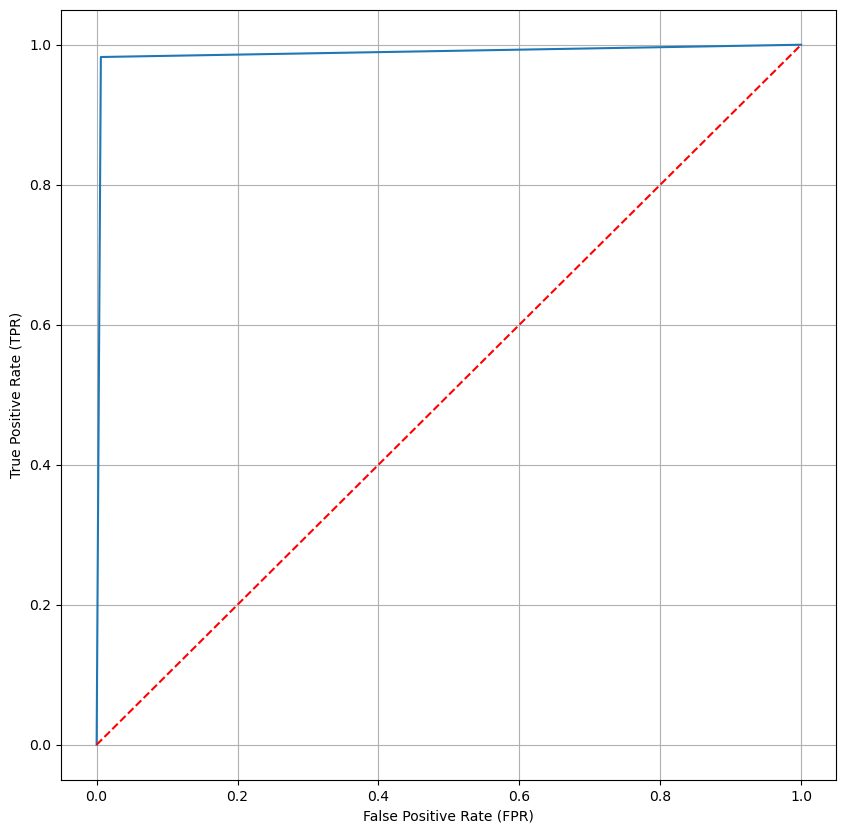

In [62]:
# Plotting the ROC Curve for Naive Bayes
# We will have False Positive Rate as fpr and True Positive Rate as tpr
from sklearn.metrics import roc_curve, roc_auc_score, auc
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred)
roc_auc = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(10,10))

#plotting
plt.plot(fpr_nb, tpr_nb)
plt.plot([0,1],[0,1], linestyle='--', color='red')
plt.grid(True)

plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.show()

Model evaluation:

1. Accuracy (99.12%)
This means that 99.12% of the emails were accurately identified as either spam or not spam. This is a high rate, showing that the model is performing very well overall.

2. Precision (98.10%)
Precision assesses how many of the emails that were predicted to be spam were indeed spam. A precision rate of 98.10% shows a very low false positive rate, which means that legitimate emails are hardly misclassified as spam.

3. Recall (98.25%)
Recall evaluates how many actual spam emails were successfully detected. With a rate of 98.25%, the model is very sensitive, missing very few spam emails (i.e., it has a low false negative rate).

4. F1 Score (98.17%)
The F1 score represents the mean of precision and recall. At 98.17%, it indicates that the model effectively balances both types of errors and maintains strong performance in both areas.


I'll be checking for overfitting by comparing the train and test accuracy

In [71]:
# Evaluate on train
y_train_pred = pipeline.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(train_accuracy)

0.9950808151791989


In [72]:
# Evaluate on test
y_test_pred = pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(test_accuracy)

0.9912188268352652


There is no indication of overfitting. As the model generalises very well with a very small difference between the trainning and test accuracy

# Reference List: 

Jurafsky, D. & Martin, J.H. (2021). Speech and Language Processing. 3rd ed. [online] Stanford University. Available at: https://web.stanford.edu/~jurafsky/slp3/. (Accessed: 20 June 2025).

Khan, A. (2021) Text Preprocessing in NLP with Python Codes, Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/ (Accessed: 19 June 2025).

Metsis, V., Androutsopoulos, I. and Paliouras, G. (2006) Spam filtering with Naive Bayes – Which Naive Bayes?, CEAS 2006 - Third Conference on Email and Anti-Spam. Available at: http://www.ceas.cc/2006/ (Accessed: 23 June 2025).

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., Blondel, M., Prettenhofer, P., Weiss, R., Dubourg, V., Vanderplas, J., Passos, A., Cournapeau, D., Brucher, M., Perrot, M. and Duchesnay, E. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, pp.2825–2830.

Rennie, J.D.M., Shih, L., Teevan, J. and Karger, D.R. (2003) Tackling the poor assumptions of Naive Bayes text classifiers, Proceedings of the 20th International Conference on Machine Learning (ICML-03), pp. 616–623. Available at: https://www.cs.cmu.edu/~jrmg/MachineLearning/nb.pdf (Accessed: 23 June 2025).

StudyMart (2021) Spam Email Detection Dataset. Kaggle. Available at: https://www.kaggle.com/datasets/studymart/spam-email-detection-dataset (Accessed: 20 June 2025).

